## Data Cleaning/Mining

Most of the real-world data, that the data scientist work with, are raw data, meaning that it can contain repeated, missing, and irrelevant entries of information. Hence, if this data is used in any machine learning analysis, it will result in low accuracy or incorrect prediction. For this reason, data cleaning, also known as data cleansing, is an important technique that comes prior to any model building.

Datasets can have categorical (typically string), numerical (typically int or float), and/or a combination of the two. Data cleansing methods for each dataset and its features may be different and hence a knowledge of appropriate methods to handle such data is important.

## Objectives

After completing this lab you will be able to:

*   Handle duplicates
*   Handle missing values
*   Encode categorical data
*   Handle the outliers



For this lab, we will be using the following libraries:
 - [`pandas`] for managing the data.


## **Import Libraries**


In [1]:
import pandas as pd
import missingno as msno

## **I. Reading and Understanding the Data**


In [2]:
## Insert code to read the dataset

ds = pd.read_csv("wk5_data.csv")

# Finding the first ten rows of the dataset
ds.head(5)

,Email date (UTC),Sender domain,Delivery action,Threats,Phish confidence level,Recipient tags
0,10/30/2023 13:32,ultalabtests.com,Delivered to junk,"Phish, Spam",Normal,UND A6
1,10/30/2023 13:31,newsletter.first-avenue.com,Blocked,"Phish, Spam",High,UND A2|UND A1|UND A6
2,10/30/2023 13:31,ioppublishing.org,Delivered to junk,"Phish, Spam",Normal,UND A1
3,10/30/2023 13:31,ioppublishing.org,Delivered to junk,"Phish, Spam",Normal,UND A1
4,10/30/2023 13:31,ioppublishing.org,Delivered to junk,"Phish, Spam",Normal,UND A6


In [3]:
# Find out more about your dataset (e.g., no. of rows, data types)

ds.info()

# Display the dimensions of your dataset in the format --> (rows, columns)
ds.shape

sum = ds["Sender domain"].isnull().sum()
print("\n")
print("null values in 'Sender domain': {}".format(sum))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89904 entries, 0 to 89903
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Email date (UTC)        89904 non-null  object
 1   Sender domain           89898 non-null  object
 2   Delivery action         89904 non-null  object
 3   Threats                 89904 non-null  object
 4   Phish confidence level  89904 non-null  object
 5   Recipient tags          89904 non-null  object
dtypes: object(6)
memory usage: 4.1+ MB


null values in 'Sender domain': 6


In [4]:
# Identifying unique values within the "Threats" and "Delivery action" features

da_values = ds['Delivery action'].unique().tolist()
threats_values = ds['Threats'].unique().tolist()

## Insert code to identify unique values for the remaining features (i.e.., Phish Confidence Level, Sender domain, and Recipient tags)
phish_con_lvl_values = ds['Phish confidence level'].unique().tolist()
sender_dom_values = ds['Sender domain'].unique().tolist()
recip_values = ds['Recipient tags'].unique().tolist()

## Insert code to display the no. of domains (i.e., unique values) in the Sender domain column
print("Unique values in 'Sender domain' column: {}".format(len(sender_dom_values)))




Unique values in 'Sender domain' column: 7004


## **II. Process the Data**

Number of missing values: Email date (UTC)          0
Sender domain             6
Delivery action           0
Threats                   0
Phish confidence level    0
Recipient tags            0
dtype: int64
shape of ds: (89904, 6)
shape of ds_dropped_na: (89898, 6)


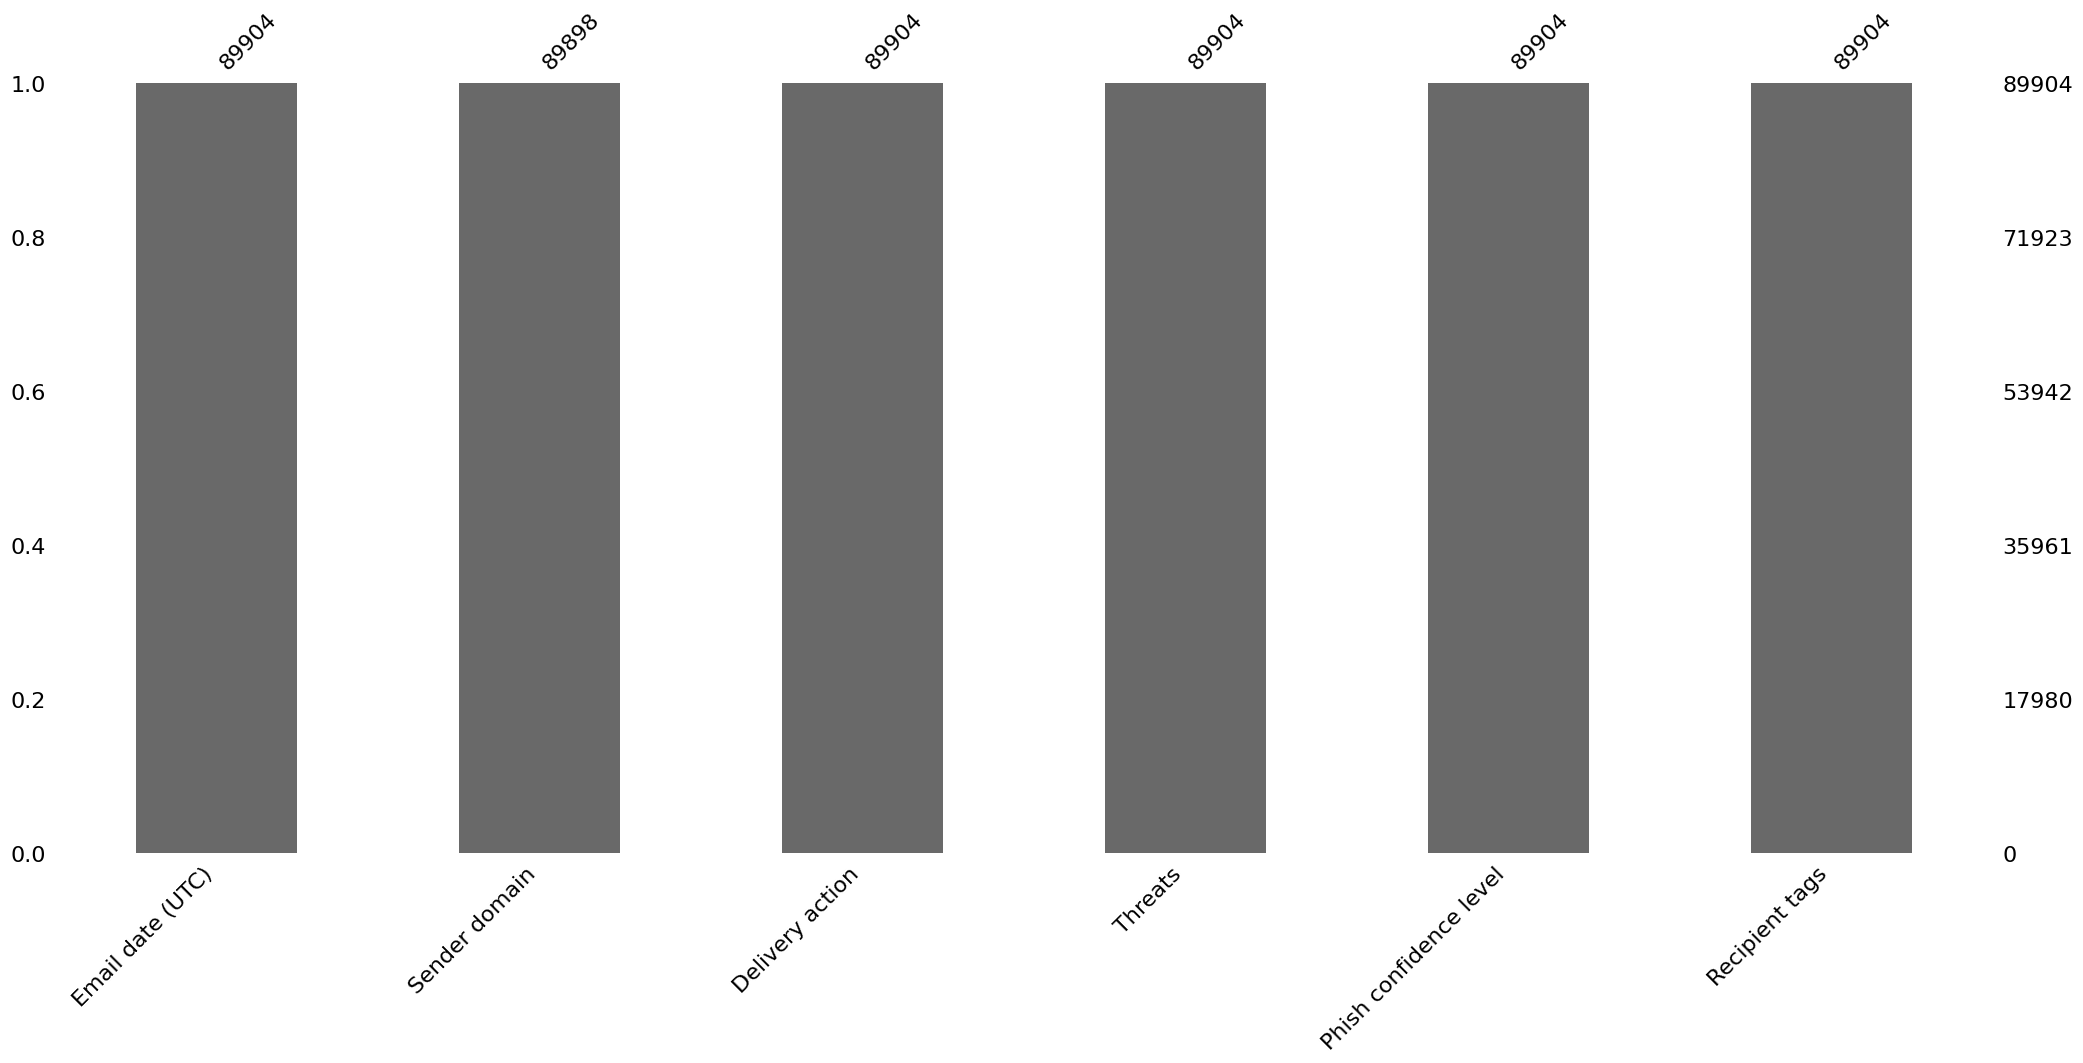

In [5]:
## In this code cell, you'd like to find out if there are any missing values in your dataset
# do we have any missing values?
missing = ds.isnull().sum()
print("Number of missing values: {}".format(missing))


## Insert code to plot the no. of missing values (i.e., count) across all the features
#msno.matrix(ds)
msno.bar(ds)

## Insert code to drop missing values for those features
# Drop the rows where at least one element is missing.
ds_dropped_na = ds.dropna()

## Insert code to display your dataset after dropping missing values
ds_dropped_na.head(5)

ds_shape = ds.shape

ds_dropped_na_shape = ds_dropped_na.shape

print("shape of ds: {}".format(ds_shape))
print("shape of ds_dropped_na: {}".format(ds_dropped_na_shape))



In [6]:
## Insert code to check for not-a-number values in the dataset and drop any rows with such values
# this is the same as above


In [23]:
# Modify the "Recipient tags" feature so there are consistent values

s = ds['Recipient tags']

s_2 = s.str.split(pat="|", expand=True)

u_list = s_2[0].unique().tolist()
print(u_list)

print("Unique values in 'u_list' column: {}".format(len(u_list)))



# example: ds[ds['Phish confidence level'] == 'High']
#ds[ds['Recipient tags'] == '-']

## Insert code to check for all values that are in multiple categories (e.g., UND A1|UND A3| UND A6) and make them equal to the first category. For instance:
## All rows with TWO OR MORE categories (e.g., UND A2 | UND A1 | UNDA6) should be changed to the first category (i.e., UND A2 in this example).
## Do the same other rows. Ignore any values that are unintelligible (e.g., hyphens).



#df_recip_tags_copy = df_recip_tags
#cleaned = df_recip_tags_copy.replace('\|\d*', '', regex=True)

#print(cleaned)

#cleaned_again = cleaned.replace('\-\d*', '', regex=True)

#print(cleaned_again)


['UND A6', 'UND A2', 'UND A1', 'UND A5', 'UND A7', 'UND A3', '-']
Unique values in 'u_list' column: 7


In [8]:
# One-hot encoding to process the "Threats" feature using one-hot encoding

data1 = pd.get_dummies(data=ds, columns = ['Threats'])

## Insert code to process the "Recipient tags" feature using one-hot encoding


## **III. Derive Insights from the Data**

In [9]:
## Insert code to calculate the top 5 domains that are generating malicious emails
ds['Sender domain'].value_counts().head(5)


,count
Sender domain,
micrsoftalerts.com,13447
und.edu,7665
ndus.edu,6773
apple-notification-system.com,6739
rigginglabacademy.com,3751


In [10]:
# Filtering the dataset only for 'high' phish confidence levels
# get high confidence level count
ds_high_confidence = ds[ds['Phish confidence level'] == 'High']

## Insert code to calculate the no. of unique values for the "Sender domain" feature with 'high' phish confidence levels
ds['Sender domain'].unique()

print('Number of Phish_confidence High values: {}'.format(len(ds_high_confidence)))
print('Number of Unique recipient values: {}'.format(len(recip_values)))


Number of Phish_confidence High values: 14611
Number of Unique recipient values: 18


In [11]:
# get ratio of high fishing confidence level and total domains

# this is a repeat from above.
# ds_high_confidence = ds[ds['Phish confidence level'] == 'High']

# total number of domains (repeated from way up top)
sender_dom_values = ds['Sender domain'].unique().tolist()

ratio_1 = len(ds_high_confidence) / len(sender_dom_values)
ratio_2 = len(sender_dom_values) / len(ds_high_confidence)

print("High confidence count: {}".format(len(ds_high_confidence)))

print("total domains count: {}".format(len(sender_dom_values)))

print("Ratio of high phishing confidence level to total domains: {}".format(ratio_2))




High confidence count: 14611
total domains count: 7004
Ratio of high phishing confidence level to total domains: 0.479364862090206


In [12]:
# need unique recipient tag values
ds_unique_recipient_tags = ds['Recipient tags'].unique()

ds_unique_recipient_tags


array(['UND A6', 'UND A2|UND A1|UND A6', 'UND A1', 'UND A5',
       'UND A1|UND A3|UND A6', 'UND A2|UND A5|UND A1', 'UND A2',
       'UND A2|UND A5', 'UND A2|UND A6', 'UND A1|UND A6', 'UND A5|UND A1',
       'UND A7', 'UND A3|UND A6', 'UND A2|UND A1', 'UND A1|UND A3',
       'UND A3', 'UND A1|UND A7', '-'], dtype=object)

In [13]:
## Insert code to display your modified dataset



## **Credits**

This dataset is provided by University of North Dakota's (UND) Information Technology (IT) department for research purposes. Do not distribute or publish this without the instructor's permission.

This assignment is partially derived from data mining and pre-processing techniques by Svitlana Kramar (IBM).